# Taco Burrito EDA (updated locations)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
pd.options.display.max_colwidth = 100

In [2]:
pd.options.display.max_rows = 500

In [3]:
data = pd.read_csv('datathon_gs_restaurant.csv')
data.head().transpose()

,0,1,2,3,4
id,AVwc--1EByjofQCxkSzo,AVwc--MdIN2L1WUfq_6L,AVwc-0E6ByjofQCxkRB-,AVwc-0FjIN2L1WUfq-Pk,AVwc-2isIN2L1WUfq-o2
address,6701 E,2300 Ponce de Leon Blvd,5631 Cottle Rd,223 W Grand Ave,5800 Broadway
categories,Fast Food Restaurant,"French Restaurant,Bakery,French Restaurant and Bakery","Breakfast Spot,American Restaurant,Diner",Mexican Restaurant,Restaurant
city,Kansas City,Miami,San Jose,Bensenville,San Antonio
country,US,US,US,US,US
cuisines,Fast Food Restaurants,NaN,NaN,NaN,Mexican
dateAdded,2016-06-13T15:25:09Z,2015-10-23T03:09:28Z,2015-09-13T04:19:10Z,2016-03-28T05:50:48Z,2016-08-02T18:33:04Z
dateUpdated,2016-10-04T05:14:22Z,2017-07-06T02:28:36Z,2017-07-01T16:23:26Z,2016-05-03T09:11:28Z,2016-08-22T11:24:03Z
keys,us/mo/kansascity/6701e/-1161002137,us/fl/miami/2300poncedeleonblvd/-1253675869,us/ca/sanjose/5631cottlerd/1836929257,us/il/bensenville/223wgrandave/1976540727,us/tx/sanantonio/5800broadway/-938675622
latitude,39.1298,25.7513,37.2511,NaN,29.4799


In [4]:
shop_loc = data[['id', 'name', 'real_state', 'city', 'address', 'postalCode', 'real_latitude', 'real_longitude']]
shop_loc.head().transpose()

,0,1,2,3,4
id,AVwc--1EByjofQCxkSzo,AVwc--MdIN2L1WUfq_6L,AVwc-0E6ByjofQCxkRB-,AVwc-0FjIN2L1WUfq-Pk,AVwc-2isIN2L1WUfq-o2
name,Mcdonald's,La Provence French Bakery,Bill's Cafe,La Quebrada De Acapulco,Paloma Blanca Mexican Cuisine
real_state,MO,FL,CA,IL,TX
city,Kansas City,Miami,San Jose,Bensenville,San Antonio
address,6701 E,2300 Ponce de Leon Blvd,5631 Cottle Rd,223 W Grand Ave,5800 Broadway
postalCode,64120,33134,95123,60106,78209
real_latitude,39.1288,25.7556,37.2462,41.9543,29.4881
real_longitude,-94.5285,-80.2664,-121.835,-87.9463,-98.4583


In [5]:
shop_loc.groupby('real_state')['id'].count() / shop_loc.shape[0] * 100

real_state
AK     0.036010
AL     0.823088
AR     0.720202
AZ     3.158599
CA    25.875817
CO     2.458974
CT     0.905396
DC     0.514430
DE     0.210916
FL     4.635012
GA     2.258347
HI     0.406400
IA     0.920829
ID     0.524718
IL     4.377797
IN     1.594732
KS     0.838521
KY     0.776789
LA     0.915685
MA     2.222337
MD     1.404393
ME     0.308658
MI     2.417820
MN     1.347806
MO     1.574155
MS     0.390967
MT     0.282936
NC     2.222337
ND     0.087453
NE     0.473275
NH     0.462987
NJ     1.846803
NM     0.997994
NV     1.553578
NY     4.439529
OH     2.104018
OK     1.085447
OR     1.826226
PA     2.330367
PR     0.020577
RI     0.318946
SC     1.023715
SD     0.149185
TN     1.486702
TX     8.863625
UT     0.751067
VA     1.959977
VI     0.010289
VT     0.087453
WA     2.176038
WI     1.352950
WV     0.257215
WY     0.210916
Name: id, dtype: float64

In [6]:
shop_loc.groupby('real_state')['id'].count().reset_index().sort_values(by='id', ascending=False)

,real_state,id
4,CA,5030
44,TX,1723
9,FL,901
34,NY,863
14,IL,851
3,AZ,614
5,CO,478
22,MI,470
38,PA,453
10,GA,439


In [7]:
state_counts = shop_loc['real_state'].value_counts().reset_index()
state_counts.columns = ['STATE_ABBR', 'cnt_shop']
state_counts['cnt_shop'].sum()

19439

In [8]:
shapefile = os.path.expanduser('~/Documents/Client/Utils/states/states.shp')

colors = 7
cmap = 'Oranges'
title = 'How many Taco/Burrito Restaurants in each state across the US'
imgfile = 'restaurant_count.png'

gdf = gpd.read_file(shapefile)[['STATE_ABBR', 'geometry']]

merged = gdf.merge(state_counts)
# remove CA
# filt = (merged['STATE_ABBR'] != 'HI') & (merged['STATE_ABBR'] != 'AK')
# merged_48 = merged[filt]
# merged_48.head()

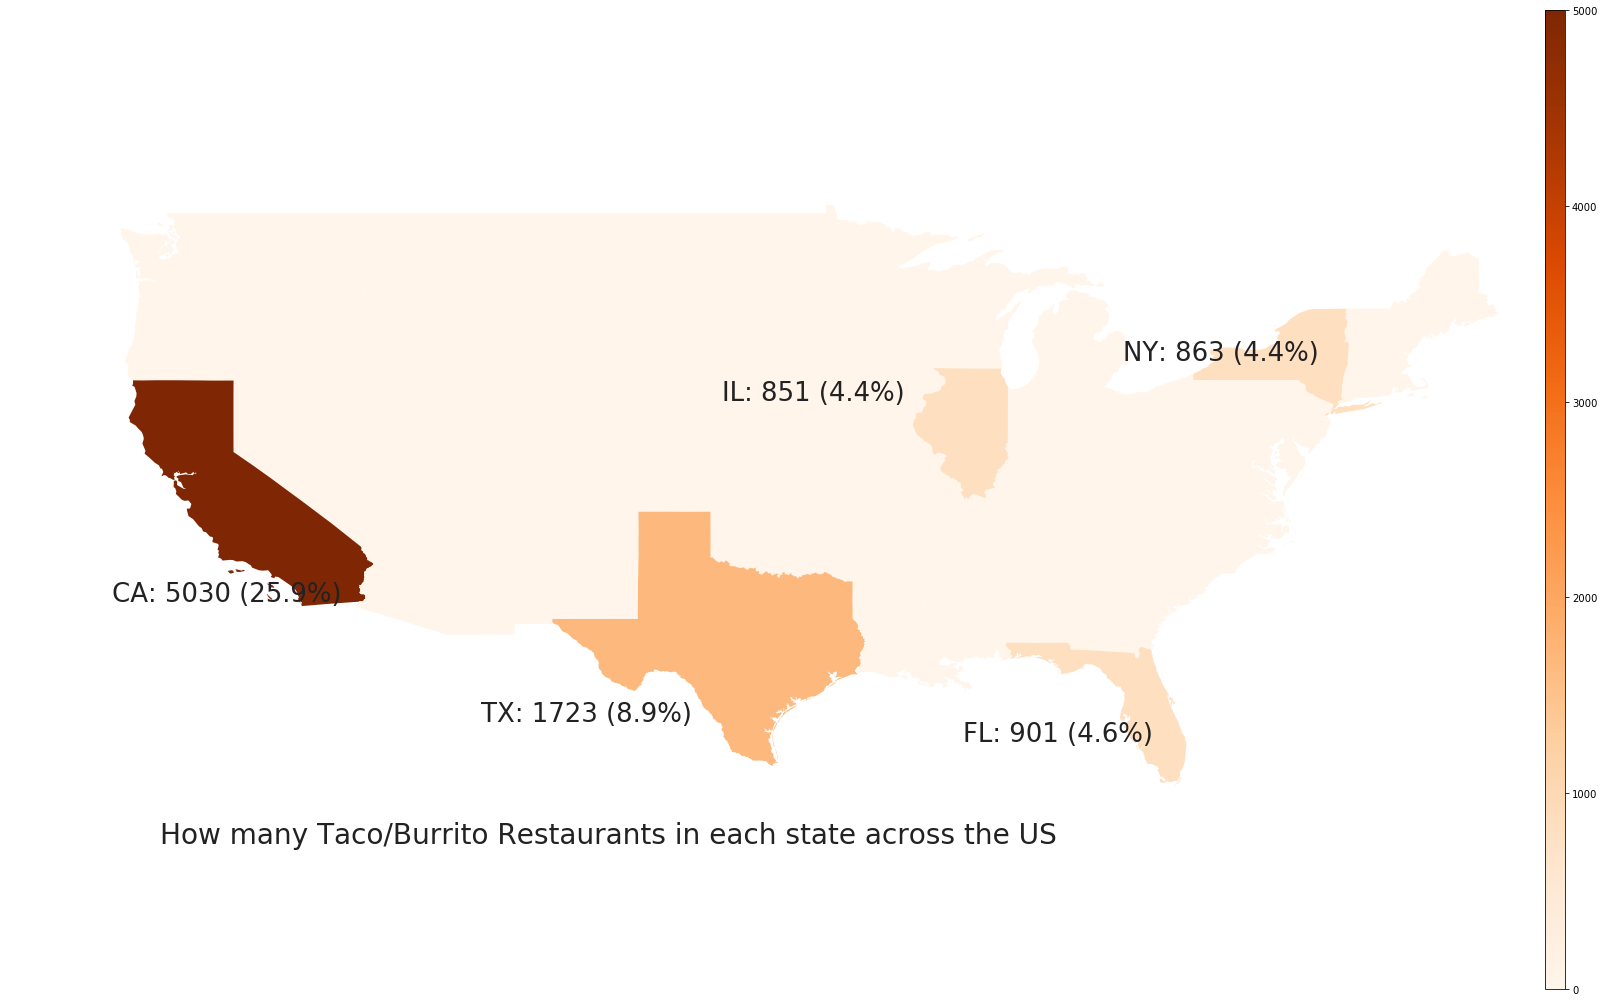

In [9]:
fig, ax = plt.subplots(1, figsize=(27, 18))
merged.plot(
    column='cnt_shop', cmap=cmap, scheme='equal_interval', ax=ax, k=colors, legend=False
)
ax.set_xlim([-125, -65])
ax.set_ylim([24, 50])
# for AK and HI
# ax.set_xlim([-160, -130])
# ax.set_ylim([20, 50])
ax.set_axis_off()

# ax.get_legend().set_bbox_to_anchor((.2, .4))
# ax.set_title('Physician Target Counts in the 50 US states', fontdict={'fontsize': '20', 'fontweight' : '2'})
ax.annotate(title, xy=(.1, .18),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=28, color='#222222')
ax.annotate('CA: 5030 (25.9%)', xy=(.07, .42),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('TX: 1723 (8.9%)', xy=(.3, .3),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('FL: 901 (4.6%)', xy=(.6, .28),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('NY: 863 (4.4%)', xy=(.7, .66),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('IL: 851 (4.4%)', xy=(.45, .62),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')

# Create colorbar as a legend
vmin, vmax = 0, 5000
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, orientation='vertical', fraction=.05, pad=0, aspect=50)

# plt.show()
plt.savefig(imgfile)